# Capstone models

In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from statsmodels.tsa.arima.model import ARIMA
import statsmodels as sm
import statsmodels.api as sm

from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv(r"C:\Users\edwar\OneDrive\Documents\Digital Futures\Capstone Project\oahufullandclean.csv")  ## reading our cleaned CSV we made in the last notebook
df

,date,northshore wh,west side wh,southshore wh,diamond head wh,east side wh,wspd,wdir,nsd
0,1990-01-01,5,2,1,1,6,6,3.0,16.0
1,1990-01-02,4,2,1,1,5,5,3.0,16.0
2,1990-01-03,8,4,2,2,5,5,3.0,1.0
3,1990-01-04,5,4,1,2,5,5,3.0,16.0
4,1990-01-05,6,4,1,2,5,6,3.0,16.0
...,...,...,...,...,...,...,...,...,...
11299,2020-12-06,8,4,1,1,2,2,17.0,15.0
11300,2020-12-07,12,7,1,1,2,3,4.0,16.0
11301,2020-12-08,15,8,2,2,2,4,5.0,16.0
11302,2020-12-09,6,3,2,2,2,2,17.0,16.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11304 entries, 0 to 11303
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             11304 non-null  object 
 1   northshore wh    11304 non-null  int64  
 2   west side wh     11304 non-null  int64  
 3   southshore wh    11304 non-null  int64  
 4   diamond head wh  11304 non-null  int64  
 5   east side wh     11304 non-null  int64  
 6   wspd             11304 non-null  int64  
 7   wdir             11304 non-null  float64
 8   nsd              11304 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 794.9+ KB


## 1) Testing and visualising the data

In [4]:
## Create a series 
series = df[['date', 'northshore wh']]
series = series.set_index('date')['northshore wh']
series

date
1990-01-01     5
1990-01-02     4
1990-01-03     8
1990-01-04     5
1990-01-05     6
              ..
2020-12-06     8
2020-12-07    12
2020-12-08    15
2020-12-09     6
2020-12-10     3
Name: northshore wh, Length: 11304, dtype: int64

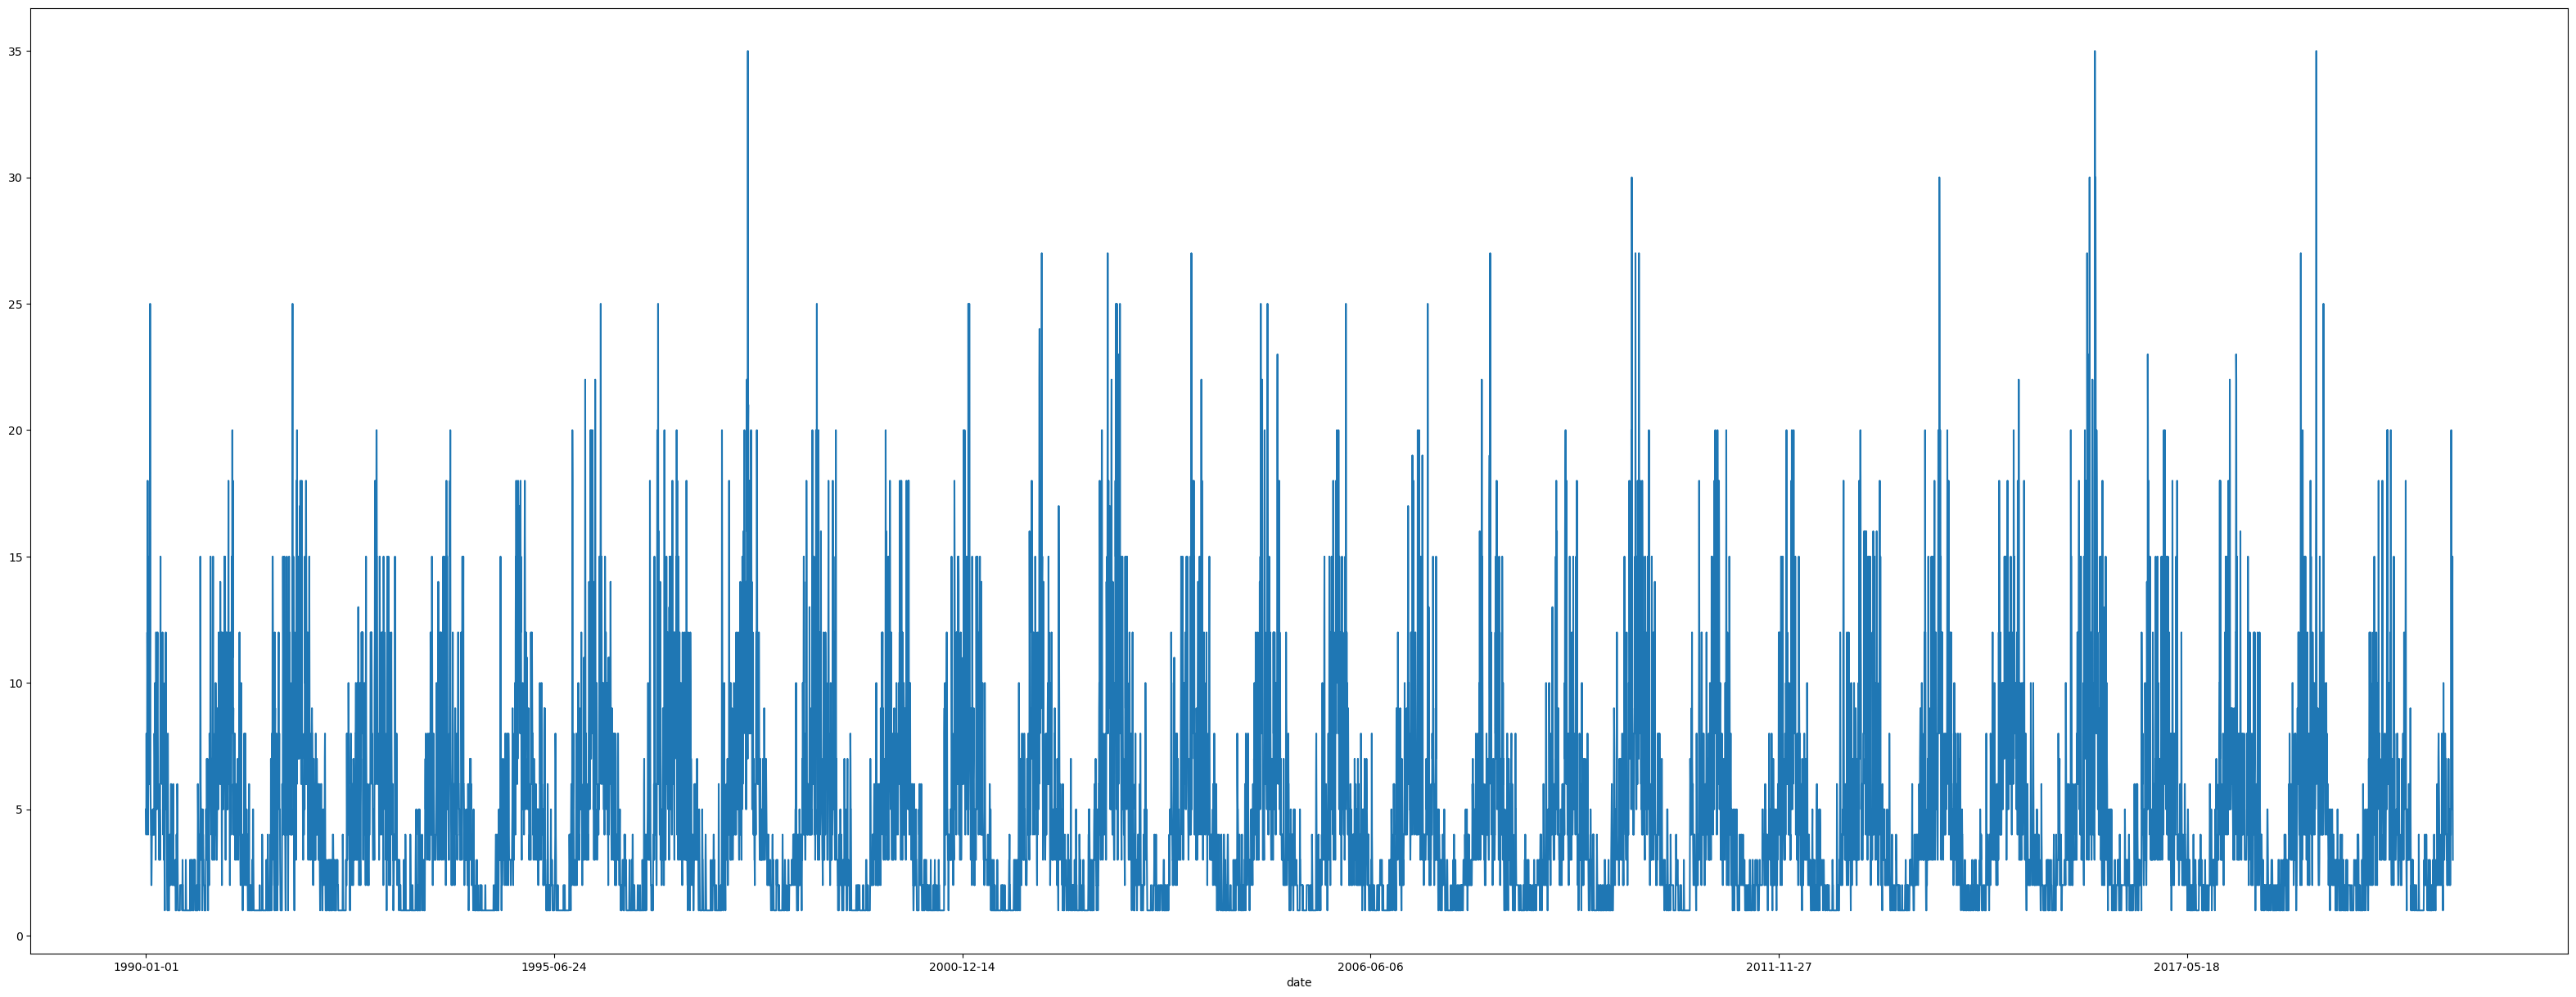

In [5]:
## Plotting Northshore Wave Height Over Time 
plt.figure(figsize = (40,15))
series.plot()
plt.show()
## Shows seasonality 

In [6]:
## Splitting the data into train and test dat es after 2015 = test
split_date = '2020-01-01'
train = series.loc[series.index < split_date].values
test = series.loc[series.index >= split_date].values

In [7]:
## Dickey Fuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(train)
print(print(f'ADF Statistic: {result[0]}'))
print(f'p-value: {result[1]}')
print(f'Critical Values:')
for key, value in result[4].items():
    print(f'    {key}:   {value}')
## Code from https://analyticsindiamag.com/quick-way-to-find-p-d-and-q-values-for-arima/

ADF Statistic: -6.827996211291291
None
p-value: 1.9257418554045042e-09
Critical Values:
    1%:   -3.430948868116085
    5%:   -2.8618046665440025
    10%:   -2.5669108768712077


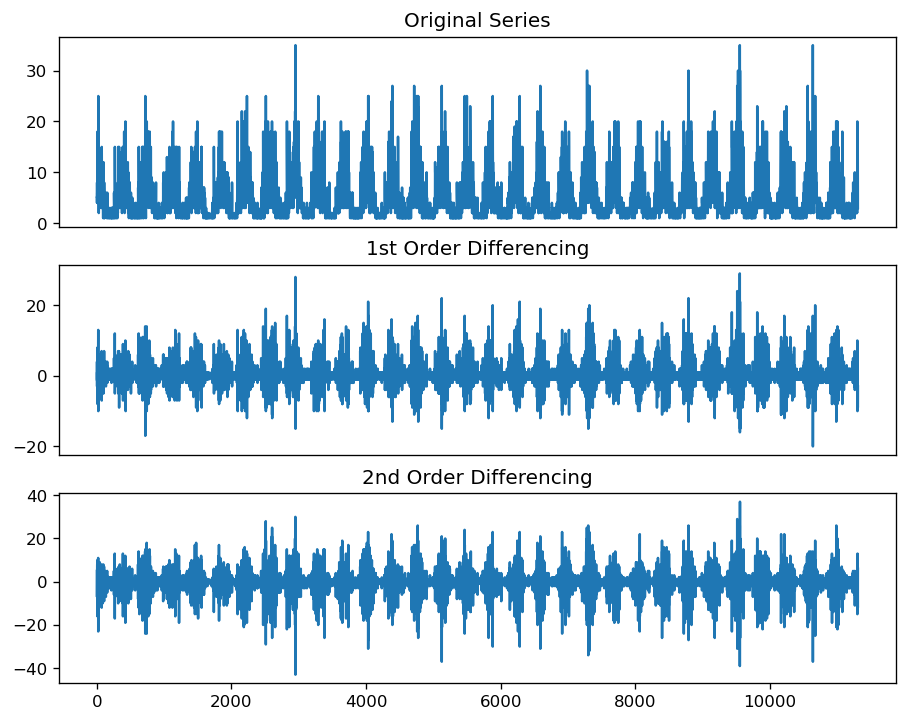

In [8]:
## Differencing 
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df['northshore wh']); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df['northshore wh'].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df['northshore wh'].diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()
## Code from https://analyticsindiamag.com/quick-way-to-find-p-d-and-q-values-for-arima/

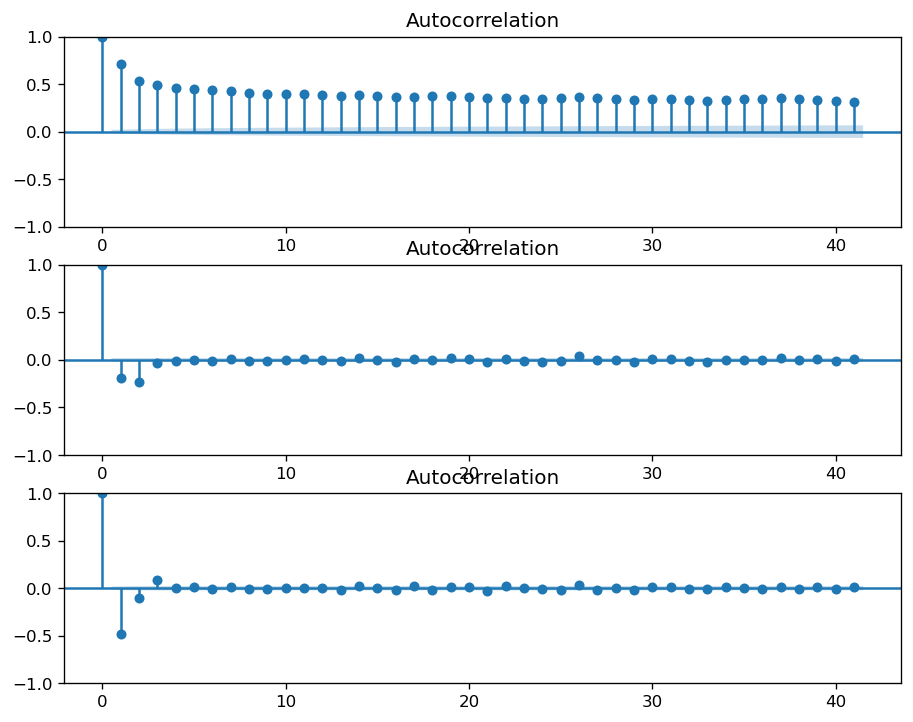

In [9]:
## Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df['northshore wh'], ax=ax1)
plot_acf(df['northshore wh'].diff().dropna(), ax=ax2)
plot_acf(df['northshore wh'].diff().diff().dropna(), ax=ax3)
plt.show()
## Code from https://analyticsindiamag.com/quick-way-to-find-p-d-and-q-values-for-arima/

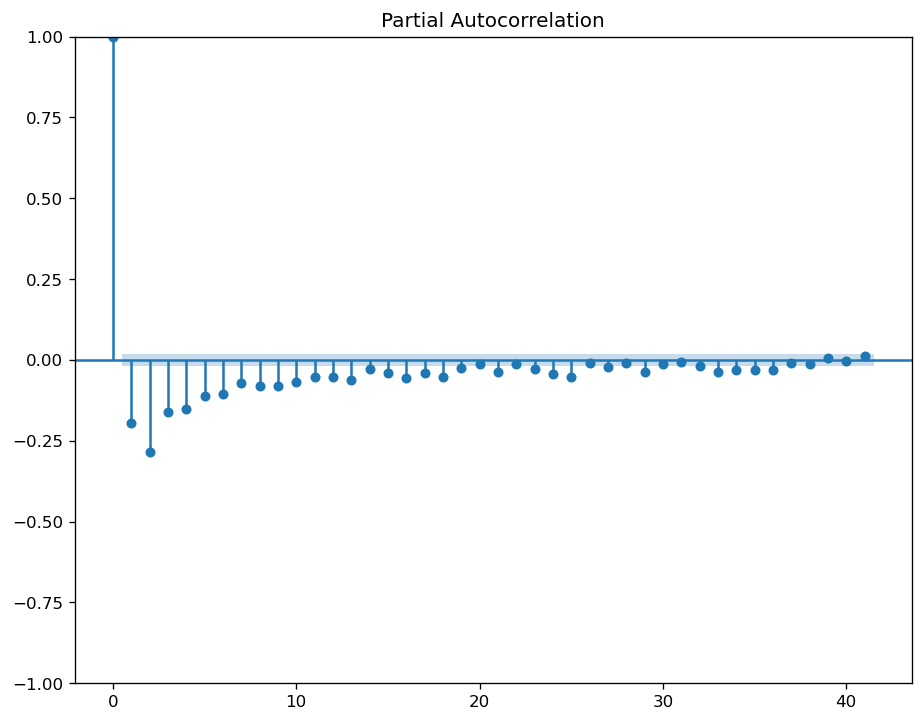

In [10]:
## Partial Autocorrelatio
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['northshore wh'].diff().dropna())
plt.show()
## Code from https://analyticsindiamag.com/quick-way-to-find-p-d-and-q-values-for-arima/

## 2) Performing the modelling

predicted=12.697334, expected=10.000000
predicted=9.304660, expected=6.000000
predicted=8.174885, expected=5.000000
predicted=7.590311, expected=5.000000
predicted=7.908724, expected=5.000000
predicted=6.899992, expected=3.000000
predicted=4.310732, expected=3.000000
predicted=3.909358, expected=3.000000
predicted=3.497993, expected=3.000000
predicted=3.376418, expected=4.000000
predicted=3.885236, expected=8.000000
predicted=6.249670, expected=3.000000
predicted=2.845194, expected=3.000000
predicted=3.810173, expected=3.000000
predicted=3.380647, expected=3.000000
predicted=3.494770, expected=3.000000
predicted=3.558486, expected=5.000000
predicted=4.323942, expected=6.000000
predicted=4.864174, expected=6.000000
predicted=5.102953, expected=8.000000
predicted=6.698634, expected=5.000000
predicted=4.804435, expected=12.000000
predicted=10.219643, expected=20.000000
predicted=14.879502, expected=7.000000
predicted=6.801181, expected=20.000000
predicted=17.801051, expected=20.000000
pre

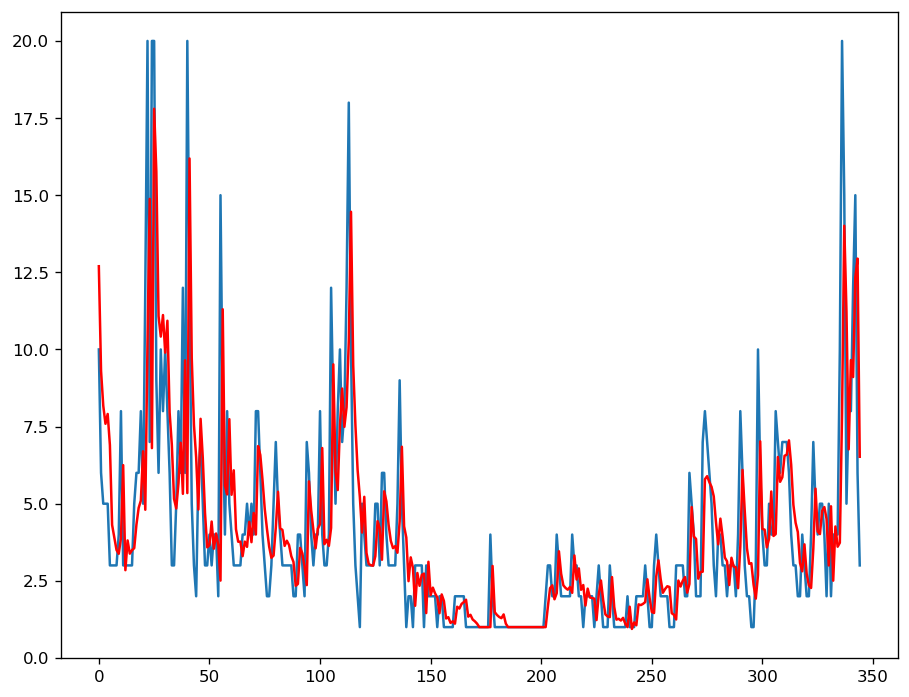

In [11]:
## Credit to https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/ for the code here 
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(metrics.mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [12]:
arimadf = pd.DataFrame(series.loc[series.index >= split_date]) ## Creating a DF readty ro add the Arima predictions to 

In [13]:
arimadf['prediction'] = predictions ## Adding predictions to DF

In [14]:
arimadf['date'] = df['date'] ## Adding date to DF

In [24]:
arimadf = arimadf.drop('date', axis = 1)

In [26]:
arimadf = arimadf.reset_index()

In [27]:
mae = metrics.mean_absolute_error(arimadf['northshore wh'], arimadf['prediction']) ## Calculating MAE
mae

1.494929729009556

In [28]:
rmse = metrics.mean_squared_error(arimadf['northshore wh'], arimadf['prediction'], squared=False)  ## Calculating RMSE
rmse

2.519785485453212

In [29]:
mse = metrics.mean_squared_error(arimadf['northshore wh'], arimadf['prediction'], squared = True)  ## Calculating MSE
mse

6.349318892700679

In [30]:
mape = metrics.mean_absolute_percentage_error(arimadf['northshore wh'], arimadf['prediction'])  ## Calculating MAPE
mape

0.3862770534527965

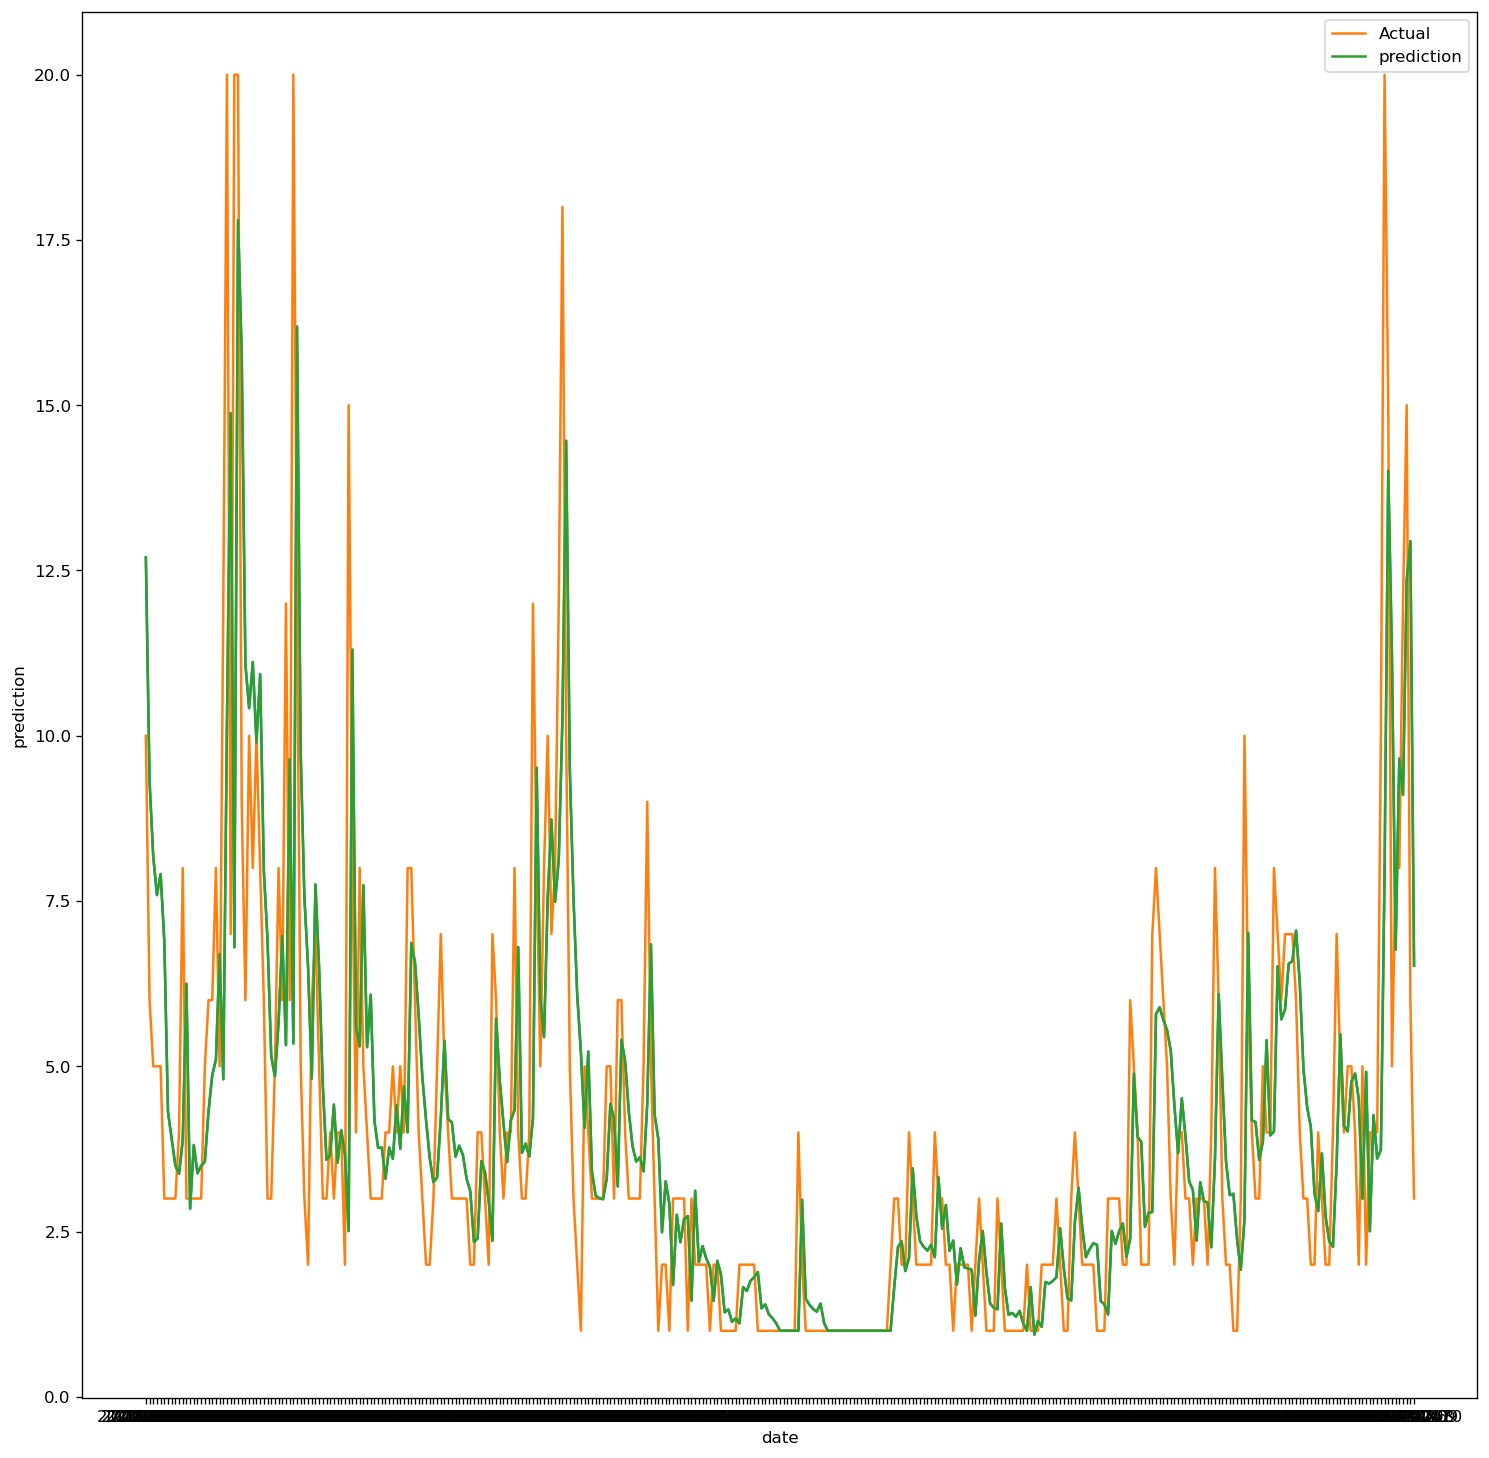

In [31]:
## PLotting results 
plt.figure(figsize = (15,15))
sns.lineplot(data = arimadf['prediction'])
sns.lineplot(data=arimadf, x='date', y='northshore wh', label='Actual')
sns.lineplot(data=arimadf, x='date', y= 'prediction', label='prediction')
plt.show()

In [21]:
arimadf.to_csv('arima.csv', index=False) ## Exporting DF

## 2.0 Linear regression model 

In [58]:
## Feature engineering the data for linear regression 
def speedclean(data):
    data = data.copy()
    data = pd.get_dummies(data, columns = ['wdir'], prefix = 'wdir', drop_first = True, dtype = int)
    data = pd.get_dummies(data, columns = ['nsd'], prefix = 'wdir', drop_first = True, dtype = int)
    data = sm.add_constant(data)
    data = data.drop('diamond head wh', axis = 1)
    return data

In [60]:
def speedclean2(data):
    data['month'] = data['date'].dt.month
    data['day_of_week'] = data['date'].dt.dayofweek
    data = pd.get_dummies(data, columns=['month', 'day_of_week'], drop_first = True, dtype = int)
    data = data.drop('date', axis = 1)
    return data

In [65]:
dffe = speedclean(df)

In [66]:
dffe['date'] = pd.to_datetime(dffe['date']) ## Converting date column to DateTime

In [67]:
train = dffe.loc[df['date'] < split_date]  ## Train Test Splitting
test = dffe.loc[df['date'] >= split_date]

In [68]:
train.shape

(10959, 34)

In [69]:
test.shape

(345, 34)

In [70]:
train = speedclean2(train)

C:\Users\edwar\AppData\Local\Temp\ipykernel_2408\3260666657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['date'].dt.month
C:\Users\edwar\AppData\Local\Temp\ipykernel_2408\3260666657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_week'] = data['date'].dt.dayofweek


In [71]:
train.shape

(10959, 50)

In [72]:
test = speedclean2(test)

C:\Users\edwar\AppData\Local\Temp\ipykernel_2408\3260666657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['date'].dt.month
C:\Users\edwar\AppData\Local\Temp\ipykernel_2408\3260666657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_week'] = data['date'].dt.dayofweek


In [73]:
test.shape

(345, 50)

In [75]:
X_train = train.drop('northshore wh', axis = 1)
X_train;

In [76]:
y_train = train['northshore wh']
y_train;

In [77]:
X_test = test.drop('northshore wh', axis = 1)
X_test;

In [78]:
y_test = test['northshore wh']
y_test;

In [79]:
lin_reg = sm.OLS(y_train, X_train) 

In [80]:
results = lin_reg.fit()

In [81]:
train['y_train_pred'] = results.predict(X_train)

In [90]:
## Train metrics
mae = metrics.mean_absolute_error(train['northshore wh'], train['y_train_pred'])
print(f'mae = {mae}')
rmse = metrics.mean_squared_error(train['northshore wh'], train['y_train_pred'], squared=False)
print(f'mse = {rmse}')
mse = metrics.mean_squared_error(train['northshore wh'], train['y_train_pred'])
print(f'rmse = {mse}')
mape = metrics.mean_absolute_percentage_error(train['northshore wh'], train['y_train_pred'])
print(f'mape = {mape}')

mae = 1.1034820986840126
mse = 1.4889152155253917
rmse = 2.2168685190230235
mape = 0.3870831596584985


In [91]:
test['y_test_pred'] = results.predict(X_test)

In [92]:
## Test Metrics
mae = metrics.mean_absolute_error(test['northshore wh'], test['y_test_pred'])
print(f'mae = {mae}')
rmse = metrics.mean_squared_error(test['northshore wh'], test['y_test_pred'], squared=False)
print(f'mse = {rmse}')
mse = metrics.mean_squared_error(test['northshore wh'], test['y_test_pred'])
print(f'rmse = {mse}')
mape = metrics.mean_absolute_percentage_error(test['northshore wh'], test['y_test_pred'])
print(f'mape = {mape}')

mae = 1.070336457748672
mse = 1.3667635668193856
rmse = 1.8680426475848488
mape = 0.4245754269414902


In [86]:
test_results = test[['northshore wh','y_test_pred']]

In [87]:
test_results['date'] = df.loc[:, 'date']

C:\Users\edwar\AppData\Local\Temp\ipykernel_2408\3062516528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_results['date'] = df.loc[:, 'date']


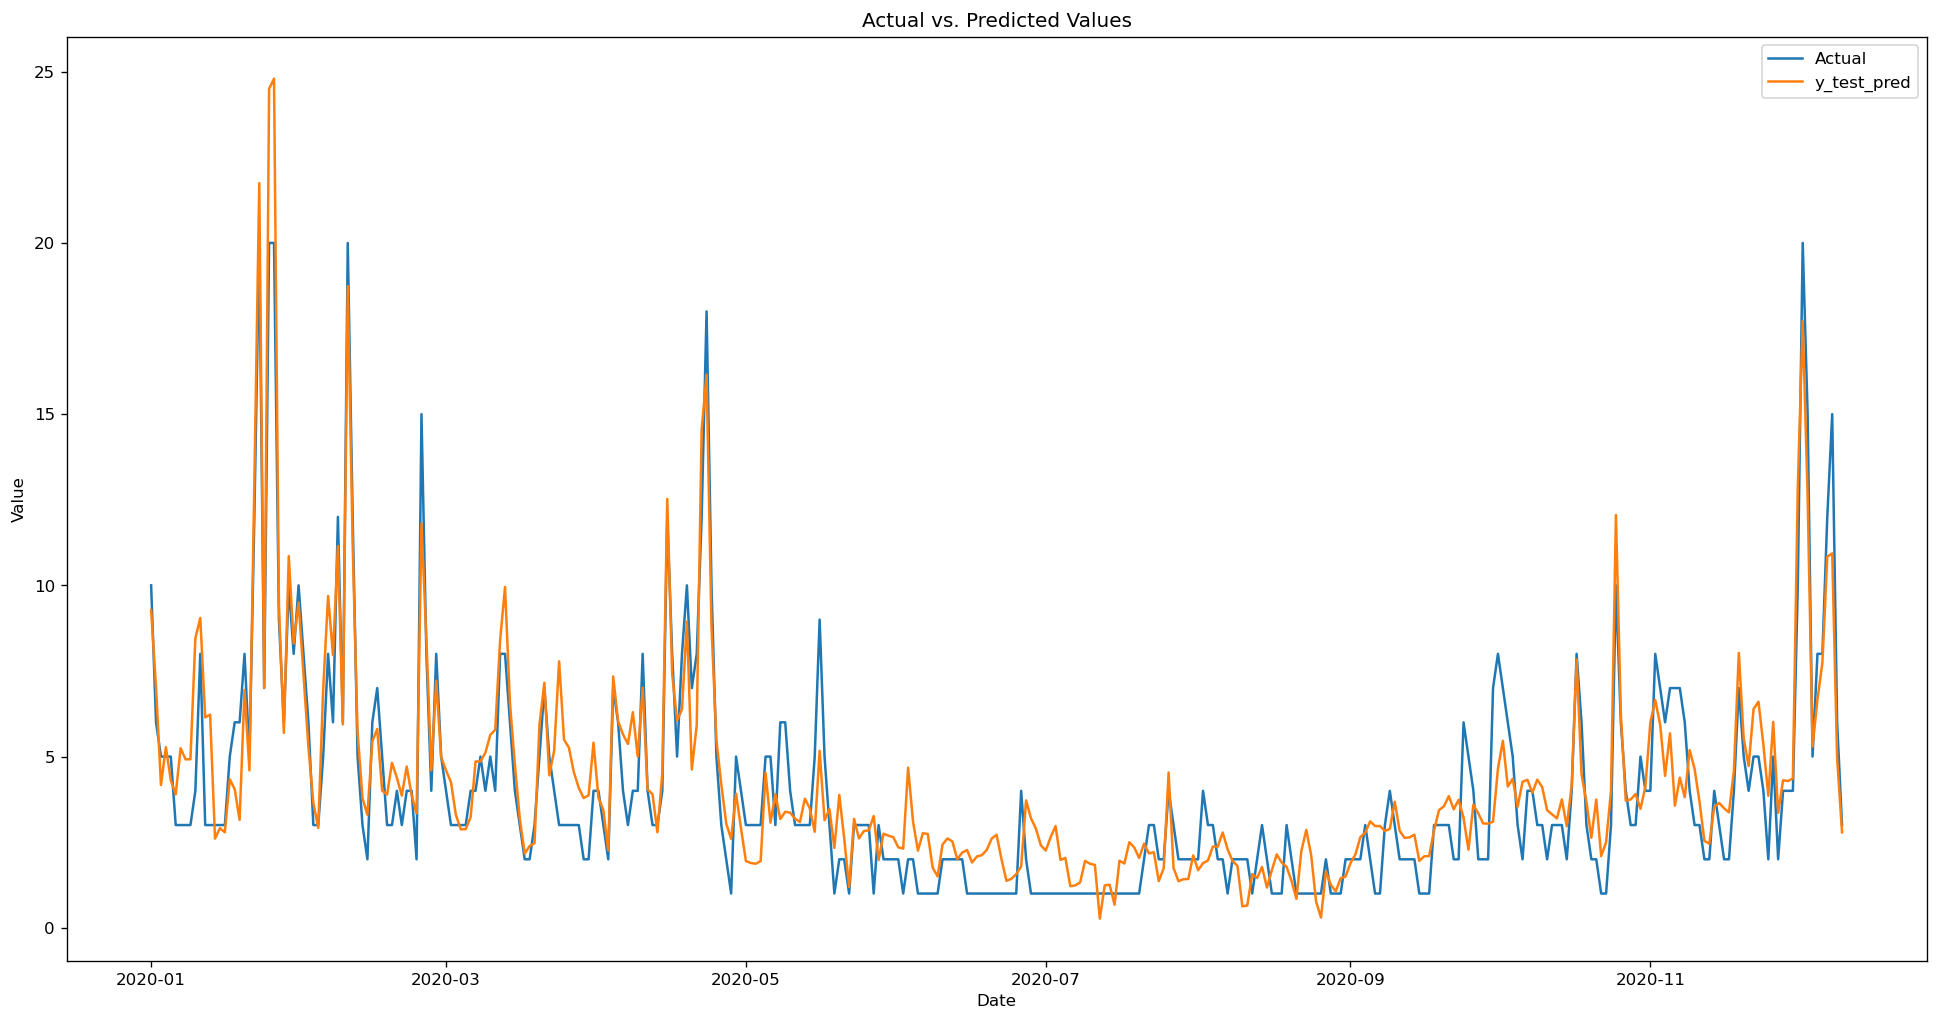

In [89]:
## Plotting results
plt.figure(figsize=(20, 10))
sns.lineplot(data=test_results, x='date', y='northshore wh', label='Actual')
sns.lineplot(data=test_results, x='date', y='y_test_pred', label='y_test_pred')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [ ]:
test_results.to_csv('linreg_results.csv', index=False)